# Part I - Ford GoBike Data Analysis
## by Dane

## Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.



## Preliminary Wrangling
Please see file Ford-GoBike-Data-Wranling for data wrangling steps.  The data was pretty clean but needed some adjustments and was put into a separate file for clarity.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from gobike_data_wrangling import gobike_data

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
bikes, stations = gobike_data()

In [4]:
bikes.head()

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,13,4902,Customer,1984,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,81,2535,Customer,<NA>,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,3,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,70,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,222,4898,Subscriber,1974,Male,Yes


In [5]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   end_station_id           183412 non-null  object        
 5   bike_id                  183412 non-null  object        
 6   user_type                183412 non-null  category      
 7   member_birth_year        175147 non-null  Int64         
 8   member_gender            175147 non-null  category      
 9   bike_share_for_all_trip  183412 non-null  object        
dtypes: Int64(1), category(2), datetime64[ns](2), int64(1), object(4)
memory usage: 11.7+ MB


In [6]:
bikes.describe()

,duration_sec,member_birth_year
count,183412.000000,175147.000000
mean,726.078435,1984.806437
std,1794.389780,10.116689
min,61.000000,1878.000000
25%,325.000000,1980.000000
50%,514.000000,1987.000000
75%,796.000000,1992.000000
max,85444.000000,2001.000000


In [6]:
stations.head()

,id,name,longitude,latitude
0,21,Montgomery St BART Station (Market St at 2nd St),-122.400811,37.789625
1,23,The Embarcadero at Steuart St,-122.391034,37.791464
2,86,Market St at Dolores St,-122.426826,37.769305
3,375,Grove St at Masonic Ave,-122.446546,37.774836
4,7,Frank H Ogawa Plaza,-122.271738,37.804562


### What is the structure of your dataset?

The dataset is organised into two DataFrames:

- stations: this is a DF of the stations used the below dataset.  It contains the station ID, name, longitude, latitude.
- bikes: this is a DF of all the various bike raides in 2019.  It includes some information about the member, the ride, and which stations the rides started & ended.``

### What is/are the main feature(s) of interest in your dataset?

The main feature of the dataset is the bike rental differences between the difference members: do certain genders rent bikes more often?  Do genders rent bikes for longer? Do certain ages/age groups rent bikes more often or longer?  Are more members subscribers or is it mainly one off rentals?  Do subscribers rent bikes more often or for longer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The dataset has a lot of good data about members who rented bikes (gender & birth year) and lots of information about the rides themselves (station information, start/end times, duration, etc). 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [7]:
# Set up some default values
default_color = sb.color_palette()[0]

# Remove columns with null values in gender, birth year, and user_type year since this will focus on member analysis
bikes.dropna(subset = ['member_gender', 'member_birth_year', 'user_type'], inplace = True)
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             175147 non-null  int64         
 1   start_time               175147 non-null  datetime64[ns]
 2   end_time                 175147 non-null  datetime64[ns]
 3   start_station_id         175147 non-null  object        
 4   end_station_id           175147 non-null  object        
 5   bike_id                  175147 non-null  object        
 6   user_type                175147 non-null  category      
 7   member_birth_year        175147 non-null  Int64         
 8   member_gender            175147 non-null  category      
 9   bike_share_for_all_trip  175147 non-null  object        
dtypes: Int64(1), category(2), datetime64[ns](2), int64(1), object(4)
memory usage: 12.5+ MB


### Question 1: Which gender rents the most bikes?

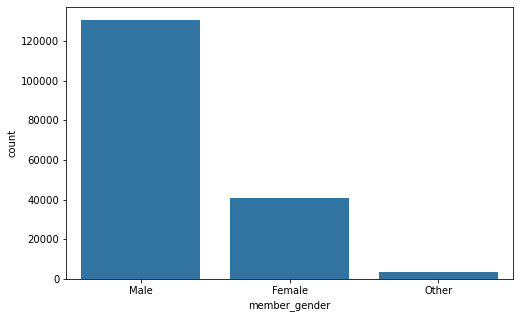

In [8]:
plt.figure(figsize = [8, 5])
sb.countplot(data = bikes, x = 'member_gender', color = default_color);

Since gender seems to be mostly skewed towards Male, let's graph it as a proportion instead:

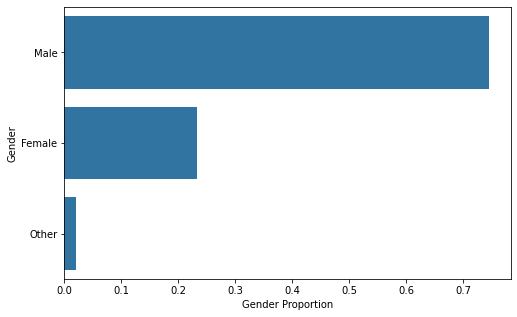

In [9]:
gender_factor = bikes.member_gender.count()
gender_count = bikes.member_gender.value_counts()
gender_count = gender_count / gender_factor

plt.figure(figsize = [8, 5])
sb.barplot(x = gender_count.values, y = gender_count.index, color = default_color)
plt.xlabel('Gender Proportion')
plt.ylabel('Gender');

### Question 2: What is the distribution of the birth years??

In [1]:
plt.figure(figsize = [8, 5])
sb.countplot(data = bikes, x = 'member_birth_year', color = default_color)
plt.xticks(rotation = 45);

NameError: name 'plt' is not defined

The scale is difficult to read since there are a few outliers.  Let's change the y-scale to be logarithmic to see differences better.

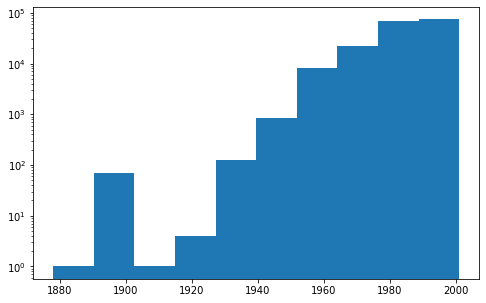

In [11]:
plt.figure(figsize = [8, 5])
plt.hist(data = bikes, x = 'member_birth_year')
plt.yscale('log')

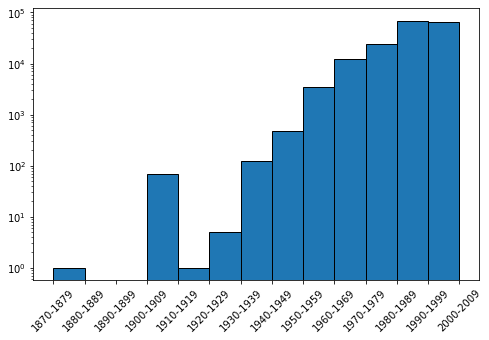

In [12]:
bin_years = np.arange(1870, bikes.member_birth_year.max()+5, 10)
xticks = np.arange(1870, bikes.member_birth_year.max()+5, 10)
xlabels = []
for i in xticks:
    xlabels.append(str(i) + '-' + str(i+9))

plt.figure(figsize = [8, 5])
plt.hist(data = bikes, x = 'member_birth_year', bins = bin_years, edgecolor = 'black')
plt.yscale('log')
plt.xticks(ticks = xticks, labels = xlabels)
plt.xticks(rotation = 45);

I find it pretty entertaining that many birthdays are pre-1930s (meaning ~89+ years old).  I assume this is mostly people putting in a significantly small enough year to get the prompt out of the way.

### Question 3: What is the distribution of the member user types?

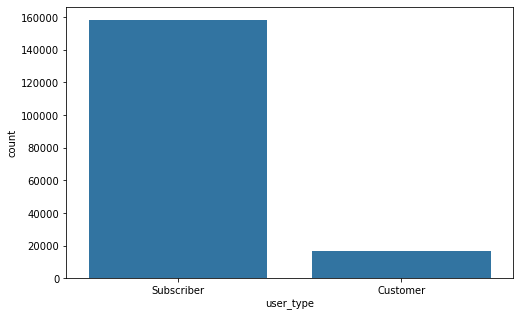

In [13]:
plt.figure(figsize = [8, 5])
sb.countplot(data = bikes, x = 'user_type', color = default_color);

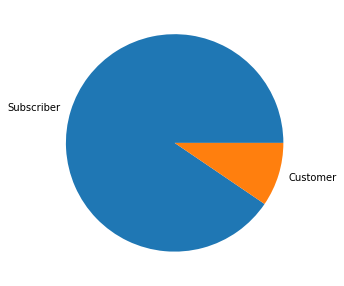

In [14]:
plt.figure(figsize = [8, 5])
plt.pie(bikes.user_type.value_counts(), labels = ['Subscriber', 'Customer']);

Pie chart was used just show how much more the members tend to be subscribers instead of one off customers.

### Question 4: What is the distribution of the rental durations?

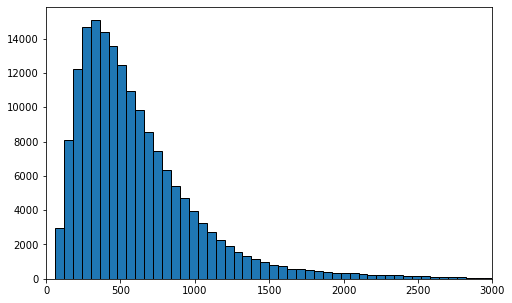

In [15]:
bins_duration = np.arange(0, bikes.duration_sec.max()+60, 60)

plt.figure(figsize = [8, 5])
plt.hist(data = bikes, x = 'duration_sec', color = default_color, bins = bins_duration, edgecolor = 'black')
plt.xlim([0, 3000]);

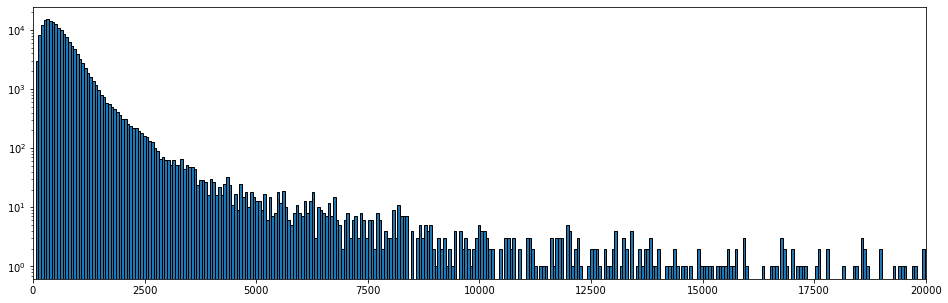

In [16]:
plt.figure(figsize = [16, 5])
plt.hist(data = bikes, x = 'duration_sec', color = default_color, bins = bins_duration, edgecolor = 'black')
plt.yscale('log')
plt.xlim([0, 20000]);

Non-surprisingly, the rentals' distribution is right-skewed.

### Question 5: What is the distribution of which day people start their rentals?

<AxesSubplot:>

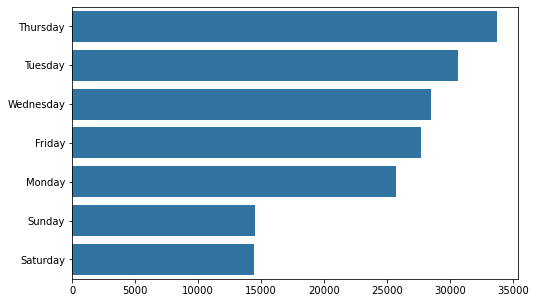

In [17]:
day_week_count = bikes.start_time.dt.day_name().value_counts()

plt.figure(figsize = [8, 5])
sb.barplot(x = day_week_count.values, y = day_week_count.index, color = default_color)

### Question 6: What is the distribution of which hour people start their rentals?

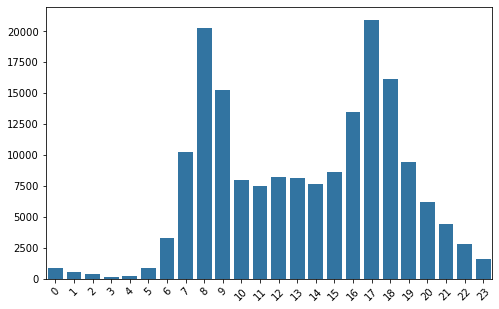

In [18]:
day_hour_count = bikes.start_time.dt.hour.value_counts()

plt.figure(figsize = [8, 5])
sb.barplot(x = day_hour_count.index, y = day_hour_count.values, color = default_color)
plt.xticks(rotation = 45);

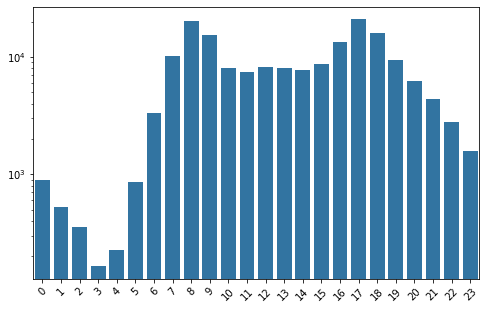

In [19]:
plt.figure(figsize = [8, 5])
sb.barplot(x = day_hour_count.index, y = day_hour_count.values, color = default_color)
plt.xticks(rotation = 45)
plt.yscale('log');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There were a few surprises/intersting features:

- Most of the rentals are done by subscribers vs one off customers.
- Subsequently, the most popular rental start hours are 8 am and 5 pm.  These seem to coincide with hours people traditionally get off work.
- The most rentals seem to take place in the middle of the week: Tuesday - Thursday.
- A large portion of all the members are male (~70%).
- Most of the birth years around 1980+ but a few are lower than 1940.  I assume these are people making the birth year sufficiently small enough to bypass any age check.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- The only real data adjustment was dropping rows where the member/user information was incomplete.  There was a significant amount of members who did not have birth years or gender so they were dropped from the dataset.  When looking at users information, the missing data would have caused problems with graphing and skewed the results.
- The most obvious distribution is the duration.  This was organized into 60s bins and it is clearly right skewed.  
- Just due to the amount of rentals, a lot of the graphs were changed to use a log scale to give a better view of changes.
- The birth year exploration was eventually grouped into bins of a decade each.  This helped minimize the amount of data and gives some idea on broad generalizations.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Question 7: Gender vs rental duration

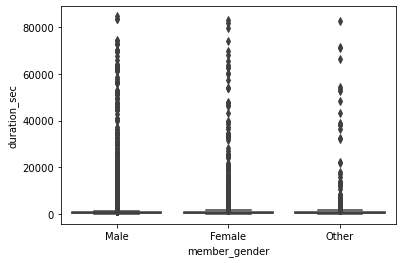

In [20]:
sb.boxplot(data = bikes, x = 'member_gender', y = 'duration_sec', color = default_color);

In [21]:
bikes.duration_sec.describe()

count    175147.000000
mean        704.211845
std        1641.608363
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

For duration of rides, the data looks askew due to some riders riding much longer and some much shorter rides.  To get a better idea of rider breakdown, let's break the duration down into quartiles and see if there are any changes to the riders.  

In [22]:
bikes['quartile_rank'] = pd.qcut(bikes.duration_sec, q = 4, labels = False)
bikes.quartile_rank.value_counts()

0    43954
2    43830
3    43733
1    43630
Name: quartile_rank, dtype: int64

In [23]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             175147 non-null  int64         
 1   start_time               175147 non-null  datetime64[ns]
 2   end_time                 175147 non-null  datetime64[ns]
 3   start_station_id         175147 non-null  object        
 4   end_station_id           175147 non-null  object        
 5   bike_id                  175147 non-null  object        
 6   user_type                175147 non-null  category      
 7   member_birth_year        175147 non-null  Int64         
 8   member_gender            175147 non-null  category      
 9   bike_share_for_all_trip  175147 non-null  object        
 10  quartile_rank            175147 non-null  int64         
dtypes: Int64(1), category(2), datetime64[ns](2), int64(2), object(4)
memory usage:

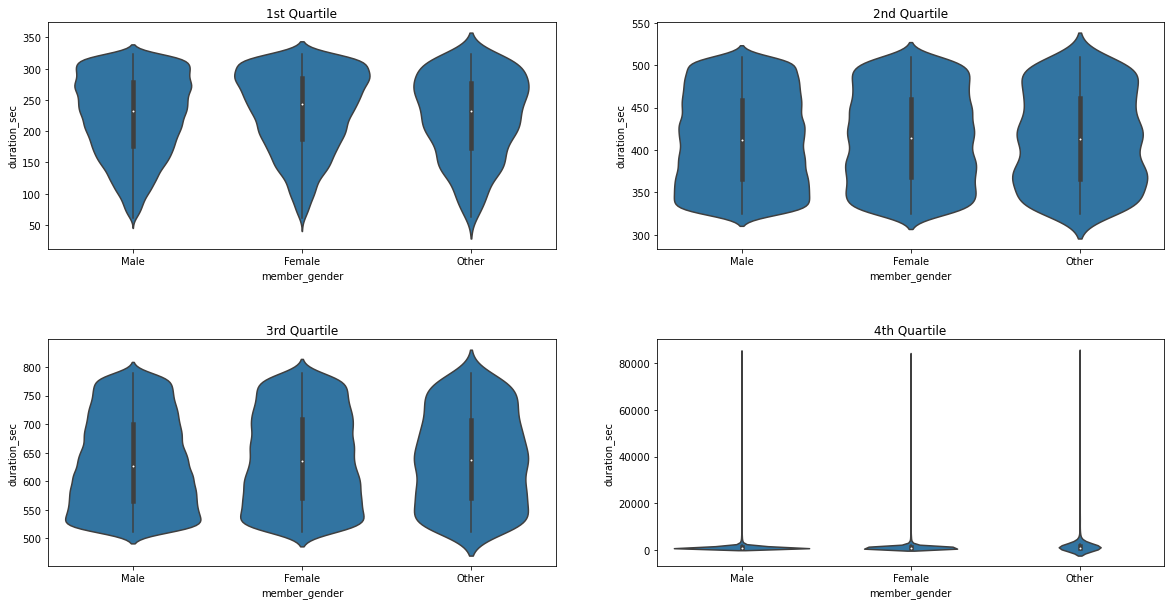

In [24]:
bikes_quartile_0 = bikes.loc[bikes.quartile_rank == 0]
bikes_quartile_1 = bikes.loc[bikes.quartile_rank == 1]
bikes_quartile_2 = bikes.loc[bikes.quartile_rank == 2]
bikes_quartile_3 = bikes.loc[bikes.quartile_rank == 3]

plt.figure(figsize = [20, 10])

plt.subplot(2, 2, 1)
sb.violinplot(data = bikes_quartile_0, x = 'member_gender', y = 'duration_sec', color = default_color)
plt.title('1st Quartile');

plt.subplot(2, 2, 2)
sb.violinplot(data = bikes_quartile_1, x = 'member_gender', y = 'duration_sec', color = default_color)
plt.title('2nd Quartile');

plt.subplot(2, 2, 3)
sb.violinplot(data = bikes_quartile_2, x = 'member_gender', y = 'duration_sec', color = default_color)
plt.title('3rd Quartile');

plt.subplot(2, 2, 4)
sb.violinplot(data = bikes_quartile_3, x = 'member_gender', y = 'duration_sec', color = default_color)
plt.title('4th Quartile')

plt.subplots_adjust(wspace = 0.2,
                    hspace = 0.4);

### Question 8: User type vs rental duration

<AxesSubplot:xlabel='user_type', ylabel='duration_sec'>

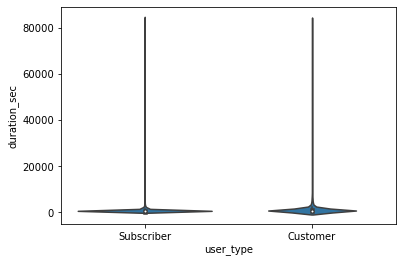

In [25]:
sb.violinplot(data = bikes, x = 'user_type', y = 'duration_sec', color = default_color)

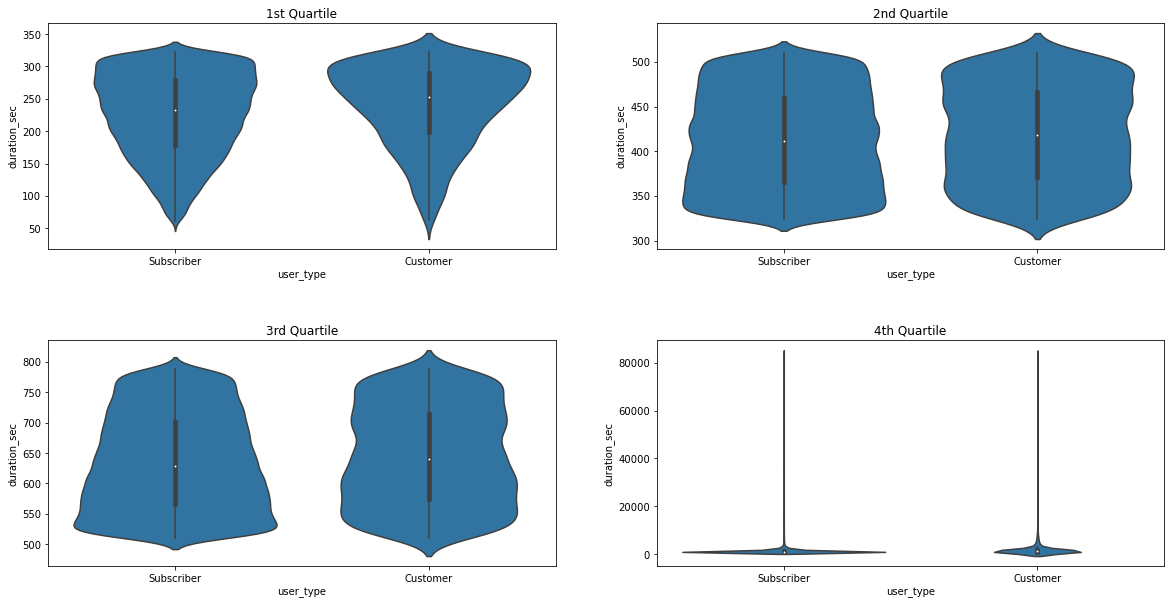

In [26]:
plt.figure(figsize = [20, 10])

plt.subplot(2, 2, 1)
sb.violinplot(data = bikes_quartile_0, x = 'user_type', y = 'duration_sec', color = default_color)
plt.title('1st Quartile');

plt.subplot(2, 2, 2)
sb.violinplot(data = bikes_quartile_1, x = 'user_type', y = 'duration_sec', color = default_color)
plt.title('2nd Quartile');

plt.subplot(2, 2, 3)
sb.violinplot(data = bikes_quartile_2, x = 'user_type', y = 'duration_sec', color = default_color)
plt.title('3rd Quartile');

plt.subplot(2, 2, 4)
sb.violinplot(data = bikes_quartile_3, x = 'user_type', y = 'duration_sec', color = default_color)
plt.title('4th Quartile')

plt.subplots_adjust(wspace = 0.2,
                    hspace = 0.4);

### Question 9: User type vs member gender

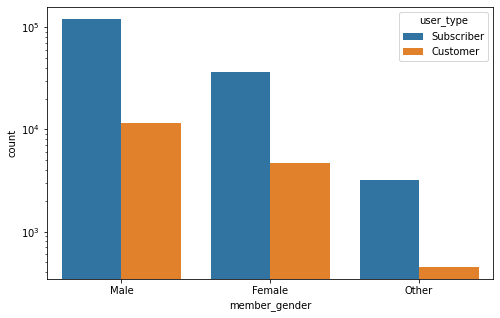

In [27]:
plt.figure(figsize = [8, 5])

sb.countplot(data = bikes, x = 'member_gender', hue = 'user_type')
plt.yscale('log');

### Question 10: User type vs rental day

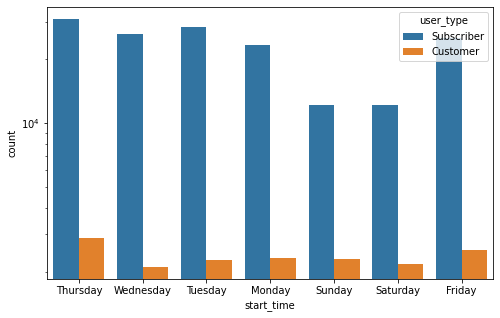

In [28]:
plt.figure(figsize = [8, 5])
sb.countplot(data = bikes, x = bikes.start_time.dt.day_name(), hue = 'user_type')
plt.yscale('log')

In [29]:
bikes['start_day'] = bikes.start_time.dt.day_name()
day_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_cat_type = pd.api.types.CategoricalDtype(categories = day_list, ordered = True)
bikes['start_day'] = bikes.start_day.astype(day_cat_type)
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             175147 non-null  int64         
 1   start_time               175147 non-null  datetime64[ns]
 2   end_time                 175147 non-null  datetime64[ns]
 3   start_station_id         175147 non-null  object        
 4   end_station_id           175147 non-null  object        
 5   bike_id                  175147 non-null  object        
 6   user_type                175147 non-null  category      
 7   member_birth_year        175147 non-null  Int64         
 8   member_gender            175147 non-null  category      
 9   bike_share_for_all_trip  175147 non-null  object        
 10  quartile_rank            175147 non-null  int64         
 11  start_day                175147 non-null  category      
dtypes: Int64(1), cat

In [30]:
bike_day = bikes.groupby('user_type')['start_day'].value_counts(normalize = True)
bike_day = bike_day.mul(100)
bike_day = bike_day.rename('percent').reset_index()
bike_day.rename(columns = {'level_1': 'start_day'}, inplace = True)
bike_day.head()

,user_type,start_day,percent
0,Subscriber,Thursday,19.466805
1,Subscriber,Tuesday,17.873905
2,Subscriber,Wednesday,16.615988
3,Subscriber,Friday,15.857705
4,Subscriber,Monday,14.737944


<AxesSubplot:xlabel='start_day', ylabel='percent'>

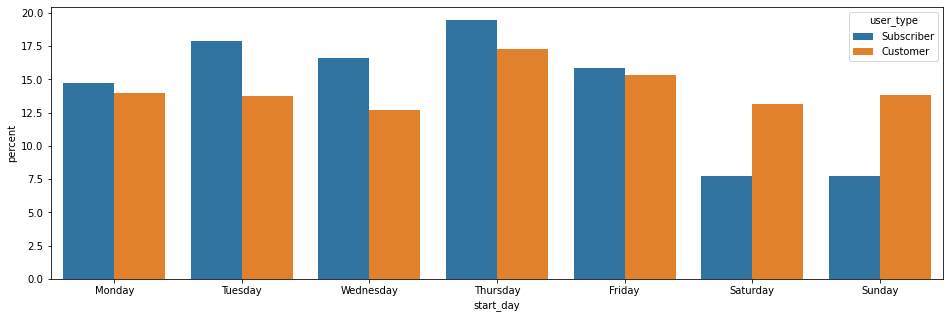

In [31]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize = [16, 5])
sb.barplot( data = bike_day, x = 'start_day', y = 'percent', hue = 'user_type')

### Question 11: User type vs rental start hour

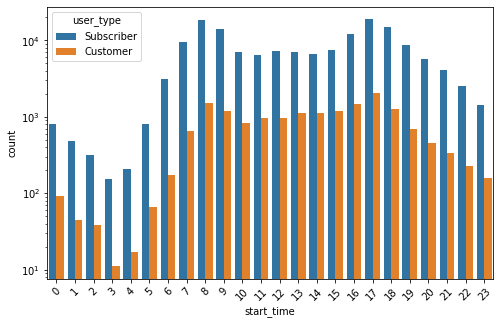

In [32]:
plt.figure(figsize = [8, 5])
sb.countplot(data = bikes, x = bikes.start_time.dt.hour, hue = 'user_type')
plt.xticks(rotation = 45)
plt.yscale('log');

In [33]:
bikes['start_hour'] = bikes.start_time.dt.hour
bike_hour = bikes.groupby('user_type')['start_hour'].value_counts(normalize = True)
bike_hour = bike_hour.mul(100)
bike_hour = bike_hour.rename('percent').reset_index()

<AxesSubplot:xlabel='start_hour', ylabel='percent'>

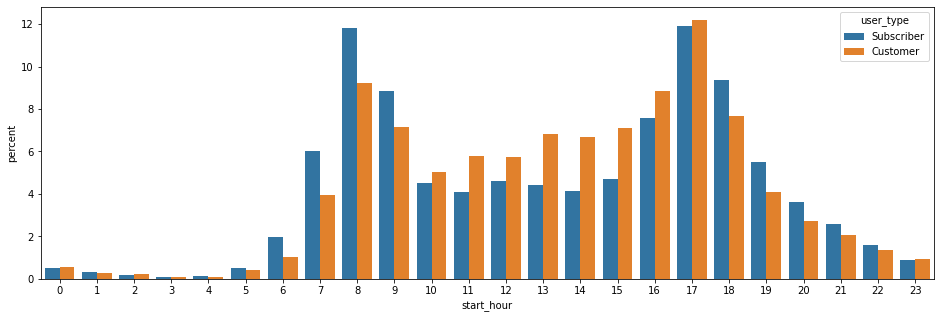

In [34]:
plt.figure(figsize = [16, 5])
sb.barplot( data = bike_hour, x = 'start_hour', y = 'percent', hue = 'user_type')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

I started off this dataset wanting to look at the relationships riders have with their ride frequency, when they ride, etc as differences between the rider's attributes (gender, year of birth, etc).  With the univariate analysis, it is quite clear that most of the riders in the data are subscribers.  

The bivariate analysis showed that the real difference in rides is different between the subscriber and customers (those who do not have a subscription).  I noticed very little differences in the riding habits between the riders' gender or birth year.  The subscription riders really seem to be focused around work hours: renting a bike in the morning (most likely before work) and one in the afternoon and renting mainly during the weekdays.  Customers tend to rent bikes at various hours and more during "vacation" days (I would define this as Friday - Monday).


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The riding times seem to be mainly focused around less than an hour.  A few people dominate rides that are much, much longer than everyone else and throw a lot of data askew.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Question 12: User type vs rental start hour vs rental duration mean 

In [35]:
bikes.head()

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,quartile_rank,start_day,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,13,4902,Customer,1984,Male,No,3,Thursday,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,3,5905,Customer,1972,Male,No,3,Thursday,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,70,6638,Subscriber,1989,Other,No,3,Thursday,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,222,4898,Subscriber,1974,Male,Yes,3,Thursday,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,323,5200,Subscriber,1959,Male,No,3,Thursday,23


In [36]:
bike_subs = bikes.query('user_type == "Subscriber"')
bike_cust = bikes.query('user_type == "Customer"')

In [37]:
subs_data = bike_subs.groupby(['start_day', 'start_hour']).mean()['duration_sec']
subs_data = subs_data.reset_index()
subs_data['duration_min'] = subs_data.duration_sec / 60
subs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   start_day     168 non-null    category
 1   start_hour    168 non-null    int64   
 2   duration_sec  168 non-null    float64 
 3   duration_min  168 non-null    float64 
dtypes: category(1), float64(2), int64(1)
memory usage: 4.6 KB


In [38]:
cust_data = bike_cust.groupby(['start_day', 'start_hour']).mean()['duration_sec']
cust_data = cust_data.reset_index()
cust_data['duration_min'] = cust_data.duration_sec / 60
cust_data.head()

,start_day,start_hour,duration_sec,duration_min
0,Monday,0,1437.0,23.950000
1,Monday,1,815.0,13.583333
2,Monday,2,752.0,12.533333
3,Monday,3,NaN,NaN
4,Monday,4,872.0,14.533333


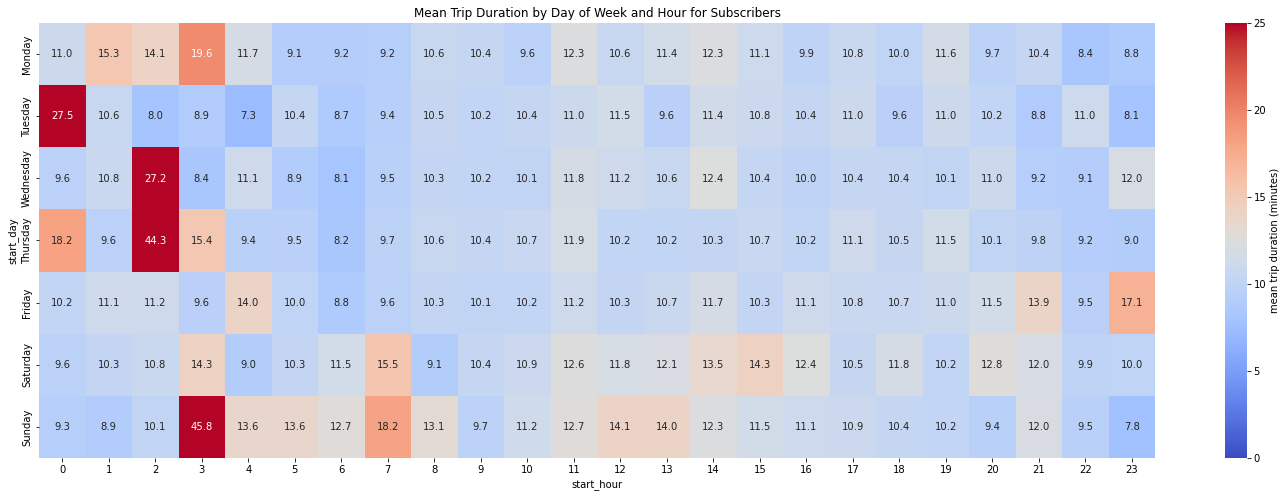

In [39]:
pivot = subs_data.pivot_table(values = 'duration_min', index = 'start_day', columns = 'start_hour')
plt.figure(figsize = (25,8))
sb.heatmap(pivot, annot = True, fmt = '.01f', cbar_kws = {'label': 'mean trip duration (minutes)'}, cmap = 'coolwarm', vmin = 0, vmax = 25)
plt.title('Mean Trip Duration by Day of Week and Hour for Subscribers');

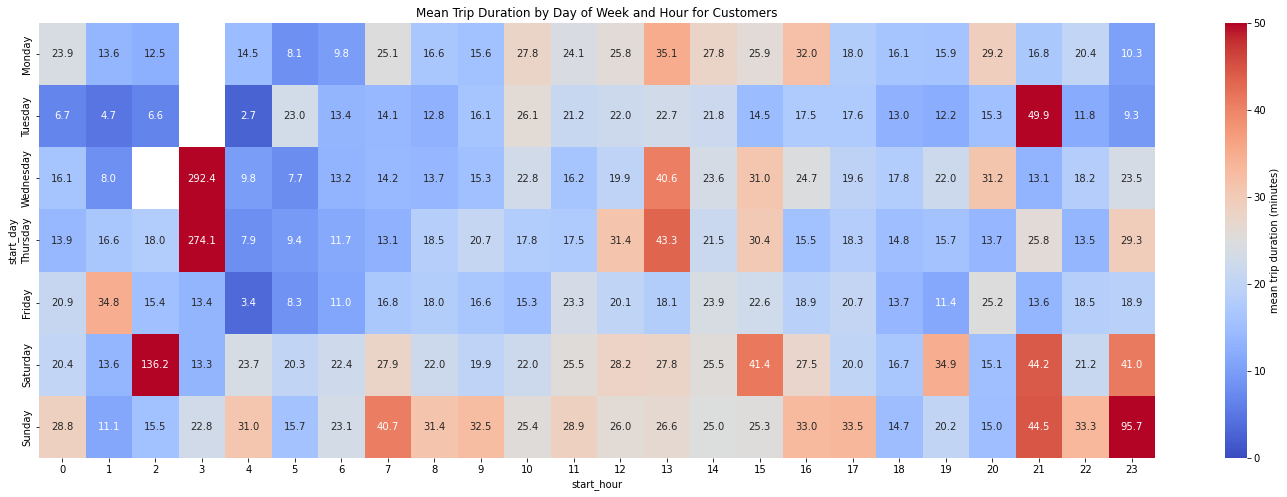

In [40]:
pivot = cust_data.pivot_table(values = 'duration_min', index = 'start_day', columns = 'start_hour')
plt.figure(figsize = (25,8))
sb.heatmap(pivot, annot = True, fmt = '.01f', cbar_kws = {'label': 'mean trip duration (minutes)'}, cmap = 'coolwarm', vmin = 0, vmax = 50)
plt.title('Mean Trip Duration by Day of Week and Hour for Customers');

Please note the difference in scale between the two heatmaps. Typically, I do not like to use different scales but the mean rental durations are much more different that it made sense to use them to give a better sense of the data.

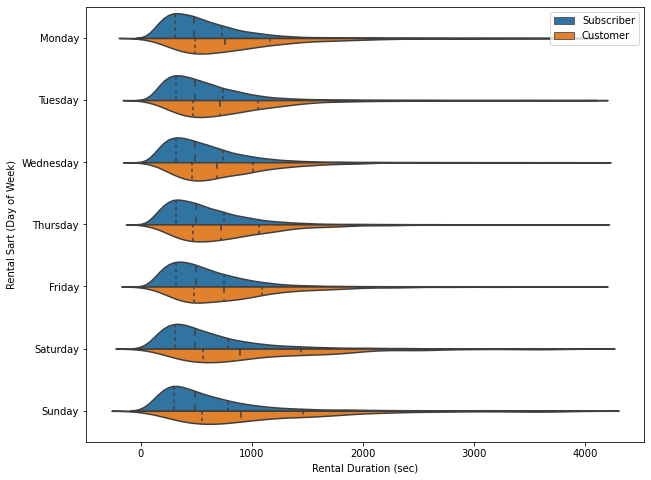

In [41]:
bike_lim_vio = bikes[bikes.duration_sec < 4000].copy()

plt.figure(figsize = [10,8])
sb.violinplot(data = bike_lim_vio, y = 'start_day', x = 'duration_sec',
              hue = 'user_type', split = True, inner = 'quartile', scale = 'area')
plt.xlabel('Rental Duration (sec)')
plt.ylabel('Rental Sart (Day of Week)')
plt.legend();

In [42]:
start_hours = np.arange(0, 24)
start_hours = start_hours.astype(str)
hour_cat_type = pd.api.types.CategoricalDtype(categories = start_hours, ordered = True)
bike_lim_vio['start_hour'] = bike_lim_vio.start_hour.astype(str)
bike_lim_vio['start_hour'] = bike_lim_vio.start_hour.astype(hour_cat_type)
bike_lim_vio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173947 entries, 4 to 183411
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             173947 non-null  int64         
 1   start_time               173947 non-null  datetime64[ns]
 2   end_time                 173947 non-null  datetime64[ns]
 3   start_station_id         173947 non-null  object        
 4   end_station_id           173947 non-null  object        
 5   bike_id                  173947 non-null  object        
 6   user_type                173947 non-null  category      
 7   member_birth_year        173947 non-null  Int64         
 8   member_gender            173947 non-null  category      
 9   bike_share_for_all_trip  173947 non-null  object        
 10  quartile_rank            173947 non-null  int64         
 11  start_day                173947 non-null  category      
 12  start_hour      

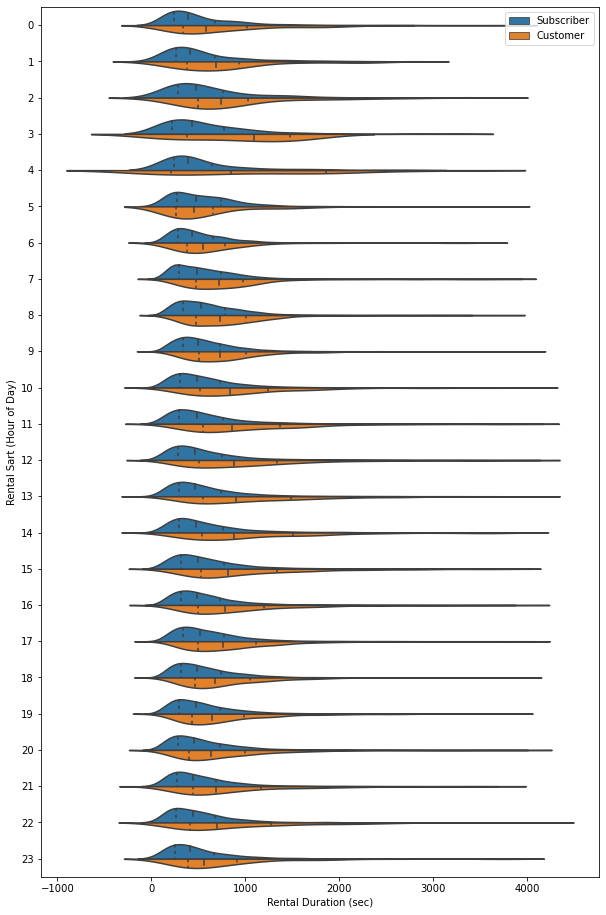

In [43]:
plt.figure(figsize = [10, 16])
sb.violinplot(data = bike_lim_vio, y = 'start_hour', x = 'duration_sec',
              hue = 'user_type', split = True, inner = 'quartile', scale = 'area')
plt.xlabel('Rental Duration (sec)')
plt.ylabel('Rental Sart (Hour of Day)')
plt.legend();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The analysis started off as a deep dive into the riders that have used the bikeshare program in San Francisco.  It was really to see what the riding habits of the different user types were.  As the analysis went on, it was clear that ridership varied the most between Subscribers and Customers.  Subscribers are the bulk of the riding but tended to ride bikes during certain, on certain days of the week, and for shorter amount of times.  Customers tend to rent bikes in or around weekends and for longer durations.

### Were there any interesting or surprising interactions between features?

I did not expect for Subscribers to be mainly users who used bikes during commuting hours.  I assumed anyone would regularly use a bike for commuting would just buy their own bike.

## Conclusions


There were several aspects about the riders that were found during the data analysis: 
* Most of the rentals are done by Subscribers, who are those that pay a monthly fee, than Customers, who pay a for the rental duration.
* When looking at the percentage of rides on specific days or specific start hours, a pattern starts to emerge that Subscribes and Customers tend to use bikes at different times.
* Subscribers use bikes around commuting hours and days while Customers tend to use bikes around weekends and throughtout the day.
* Finally, Subscribers tend to use bikes in much shorter intervals than Customers who are more likely to rent them for longer.

In [44]:
bikes.head()

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,quartile_rank,start_day,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,13,4902,Customer,1984,Male,No,3,Thursday,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,3,5905,Customer,1972,Male,No,3,Thursday,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,70,6638,Subscriber,1989,Other,No,3,Thursday,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,222,4898,Subscriber,1974,Male,Yes,3,Thursday,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,323,5200,Subscriber,1959,Male,No,3,Thursday,23


In [45]:
bikes.tail()

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,quartile_rank,start_day,start_hour
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,324,4832,Subscriber,1996,Male,No,1,Friday,0
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,66,4960,Subscriber,1984,Male,No,0,Friday,0
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278,277,3824,Subscriber,1990,Male,Yes,0,Friday,0
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,216,5095,Subscriber,1988,Male,No,0,Friday,0
183411,271,2019-02-01 00:00:20.636,2019-02-01 00:04:52.058,24,37,1057,Subscriber,1989,Male,No,0,Friday,0


In [48]:
bikes.sort_values(by = ['start_time'], ascending = True)

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,quartile_rank,start_day,start_hour
183411,271,2019-02-01 00:00:20.636,2019-02-01 00:04:52.058,24,37,1057,Subscriber,1989,Male,No,0,Friday,0
183406,706,2019-02-01 00:04:40.616,2019-02-01 00:16:27.080,138,78,5017,Subscriber,1988,Male,No,2,Friday,0
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,324,4832,Subscriber,1996,Male,No,1,Friday,0
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,216,5095,Subscriber,1988,Male,No,0,Friday,0
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,66,4960,Subscriber,1984,Male,No,0,Friday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300,312,3803,Subscriber,1983,Female,No,3,Thursday,23
14,395,2019-02-28 23:56:26.848,2019-03-01 00:03:01.947,243,252,4786,Subscriber,1988,Male,No,1,Thursday,23
11,506,2019-02-28 23:56:55.540,2019-03-01 00:05:21.733,44,343,5848,Subscriber,1993,Male,No,1,Thursday,23
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370,43,5318,Subscriber,1996,Female,Yes,1,Thursday,23
